# Explorative Datenanalyse

## Imports

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

## Datengrundlage

In [2]:
data = pd.DataFrame.from_dict({"Bayern":[29296,13140],"NRW":[37937,17926],"Niedersachsen":[15469,8003],"Baden-Württemberg":[24548,11103],"Hessen":[14243,6293],"Sachsen":[6869,4057],"Brandenburg":[4211,2531],"Rheinland-Pfalz":[10604,4098],"Sachsen-Anhalt":[3762,2181],"Schleswig-Holstein":[5927,2911],"Thüringen":[3770,2120],"Mecklenburg-Vorpommern":[3338,1611],"Berlin":[9815,3664],"Saarland":[2782,984],"Hamburg":[4517,1852],"Bremen":[1583,680]},orient="index",columns=["Restaurants","Einwohner in T"])
data["Restaurants pro T Einwohner"] = data["Restaurants"]/data["Einwohner in T"]
data.sort_values("Restaurants")

,Restaurants,Einwohner in T,Restaurants pro T Einwohner
Bremen,1583,680,2.327941
Saarland,2782,984,2.827236
Mecklenburg-Vorpommern,3338,1611,2.072005
Sachsen-Anhalt,3762,2181,1.724897
Thüringen,3770,2120,1.778302
Brandenburg,4211,2531,1.663769
Hamburg,4517,1852,2.438985
Schleswig-Holstein,5927,2911,2.036070
Sachsen,6869,4057,1.693123
Berlin,9815,3664,2.678766


# Lageparameter

## Arithmetisches Mittel

In [3]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("Das Arithmetisches Mittel der {} liegt bei {:.2f}".format(column,np.mean(data[column])))

Das Arithmetisches Mittel der Restaurants liegt bei 11166.94
Das Arithmetisches Mittel der Einwohner in T liegt bei 5197.12


## Getrimmtes Mittel

In [4]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("Das getrimmte Mittel der {} liegt bei {:.2f}".format(column,stats.trim_mean(data[column],0.1)))

Das getrimmte Mittel der Restaurants liegt bei 9939.36
Das getrimmte Mittel der Einwohner in T liegt bei 4610.57


## Median

In [5]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("Der Median der {} liegt bei {:.1f}".format(column,np.median(data[column])))

Der Median der Restaurants liegt bei 6398.0
Der Median der Einwohner in T liegt bei 3287.5


## Spannweite

Die Spannweit der Restaurants liegt bei 36354
Die Spannweit der Einwohner in T liegt bei 17246


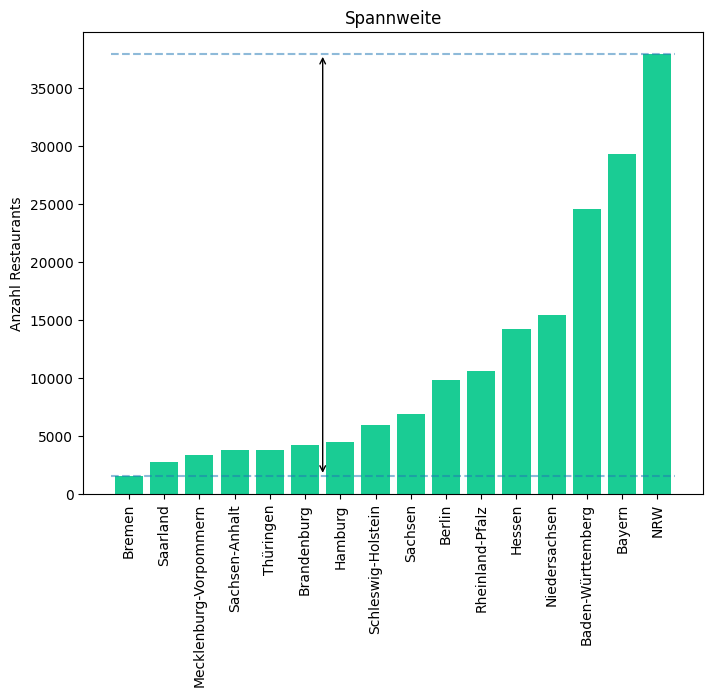

In [ ]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("Die Spannweit der {} liegt bei {:.0f}".format(column,data[column].max()-data[column].min()))

sorted_data = data.sort_values("Restaurants")

plt.figure(figsize=(8,6))
plt.bar(sorted_data.index,sorted_data["Restaurants"],color="#1ACC94")
plt.xticks(rotation=90)
plt.title("Spannweite")
plt.ylabel("Anzahl Restaurants")
plt.hlines(sorted_data["Restaurants"].max(),-0.5,15.5,ls="--",alpha=0.5)
plt.hlines(sorted_data["Restaurants"].min(),-0.5,15.5,ls="--",alpha=0.5)
plt.annotate(text='', xy=(5.5,sorted_data["Restaurants"].min()), xytext=(5.5,sorted_data["Restaurants"].max()), arrowprops=dict(arrowstyle='<->'))
plt.show()

## Mittlere absolute Abweichung (MAD)

In [7]:
def calculate_mad(series):
    return (series - series.mean()).abs().mean()

In [8]:
for column in data[["Restaurants","Einwohner in T"]]:

    mad = data[column]
    print(f"Die MAD der {column} liegt bei {round(calculate_mad(data[column]), 2)}")

Die MAD der Restaurants liegt bei 8207.29
Die MAD der Einwohner in T liegt bei 3809.92


# Streuungsmaße

## Standardabweichung

In [9]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("Die Standardabweichung der {} liegt bei {:.2f}".format(column,np.std(data[column])))

Die Standardabweichung der Restaurants liegt bei 10386.29
Die Standardabweichung der Einwohner in T liegt bei 4789.51


## Perzentil

80% der Bundesländer haben 15469 oder weniger Restaurants
80% der Bundesländer haben 8003 oder weniger Einwohner in T


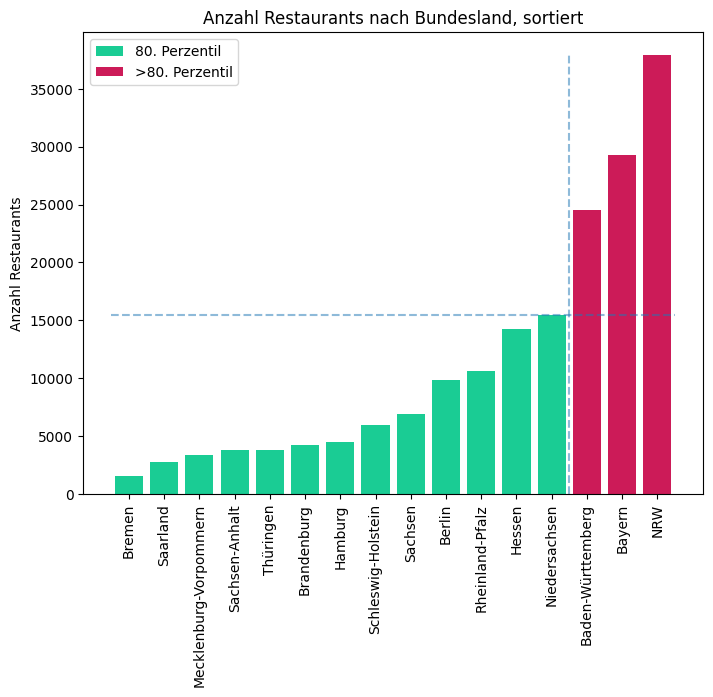

In [ ]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("80% der Bundesländer haben {:.0f} oder weniger {}".format(np.percentile(data[column],80),column))

plt.figure(figsize=(8,6))
plt.bar(sorted_data.loc[sorted_data["Restaurants"] <= 15469].index,sorted_data.loc[sorted_data["Restaurants"] <= 15469]["Restaurants"],label="80. Perzentil",color="#1ACC94")
plt.bar(sorted_data.loc[sorted_data["Restaurants"] > 15469].index,sorted_data.loc[sorted_data["Restaurants"] > 15469]["Restaurants"],label=">80. Perzentil",color="#CC1B58")
plt.xticks(rotation=90)
plt.title("Anzahl Restaurants nach Bundesland, sortiert")
plt.ylabel("Anzahl Restaurants")
plt.vlines(12.5,0,38000,ls="--",alpha=0.5)
plt.hlines(15469,-0.5,15.5,ls="--",alpha=0.5)
plt.legend()
plt.show()

## Interquartilsabstand

Der Interquartilsabstand der Restaurants liegt bei 10781.50
Der Interquartilsabstand der Einwohner in T liegt bei 4667.50


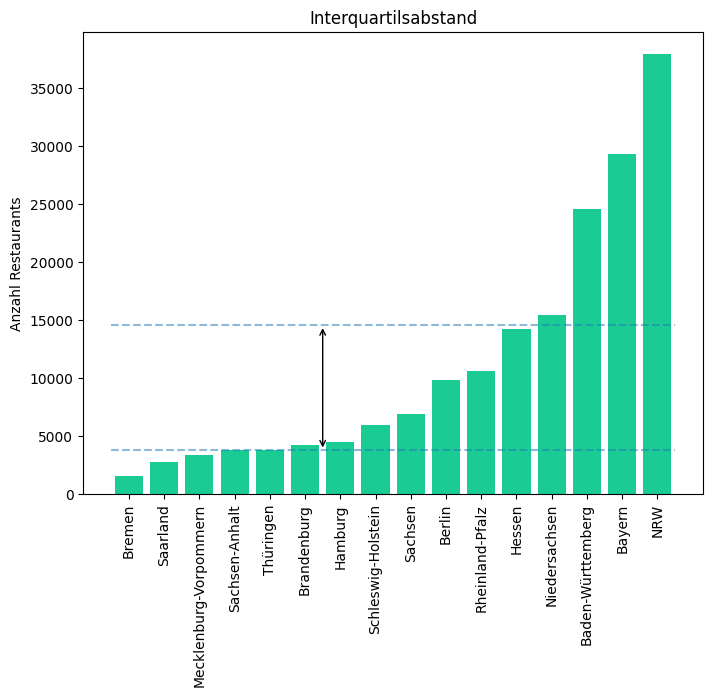

In [ ]:
for column in data[["Restaurants","Einwohner in T"]]:
    print("Der Interquartilsabstand der {} liegt bei {:.2f}".format(column,stats.iqr(data[column])))

plt.figure(figsize=(8,6))
plt.bar(sorted_data.index,sorted_data["Restaurants"],color="#1ACC94")
plt.xticks(rotation=90)
plt.title("Interquartilsabstand")
plt.ylabel("Anzahl Restaurants")
plt.hlines(np.percentile(sorted_data["Restaurants"],75),-0.5,15.5,ls="--",alpha=0.5)
plt.hlines(np.percentile(sorted_data["Restaurants"],25),-0.5,15.5,ls="--",alpha=0.5)
plt.annotate(text='', xy=(5.5,np.percentile(sorted_data["Restaurants"],25)), xytext=(5.5,np.percentile(sorted_data["Restaurants"],75)), arrowprops=dict(arrowstyle='<->'))
plt.show()

# Datenverteilungen

## Boxplot

/var/folders/6z/jr7vc1n52qlbyvvf98jx_y580000gn/T/ipykernel_50383/3162252775.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,labels=data.columns,medianprops=dict(color="#1ACC94"))


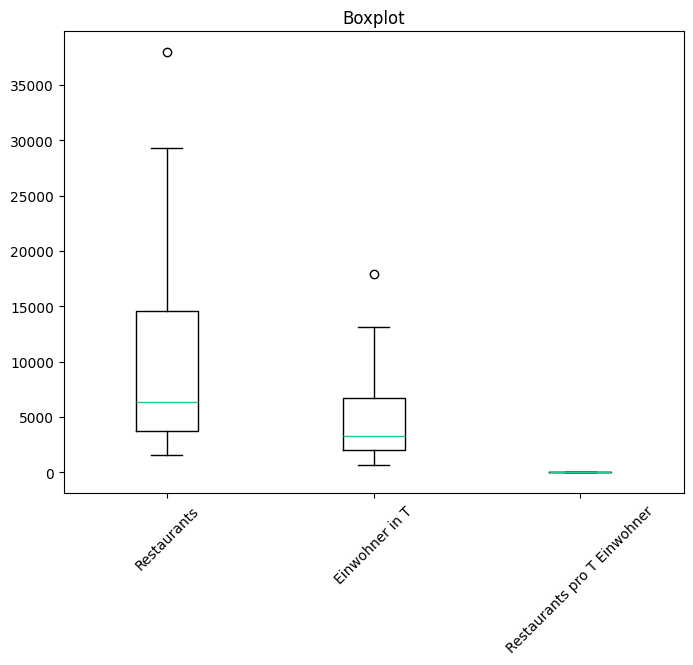

In [12]:
plt.figure(figsize=(8,6))
plt.title("Boxplot")
plt.boxplot(data,labels=data.columns,medianprops=dict(color="#1ACC94"))
plt.xticks(rotation=45)
plt.show()

## Histogramm

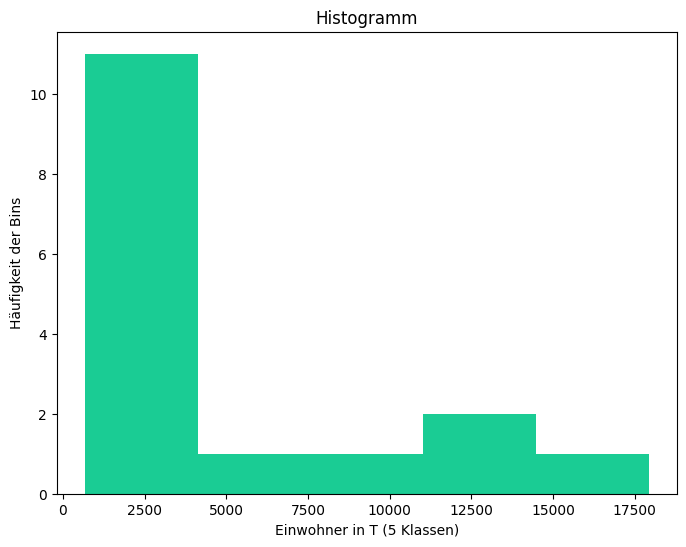

In [13]:
plt.figure(figsize=(8,6))
plt.title("Histogramm")
plt.hist(data["Einwohner in T"],bins=5,color="#1ACC94")
plt.ylabel("Häufigkeit der Bins")
plt.xlabel("Einwohner in T (5 Klassen)")
plt.show()

## Dichtediagramm

/var/folders/6z/jr7vc1n52qlbyvvf98jx_y580000gn/T/ipykernel_50383/4288554434.py:1: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = stats.kde.gaussian_kde(data["Einwohner in T"])


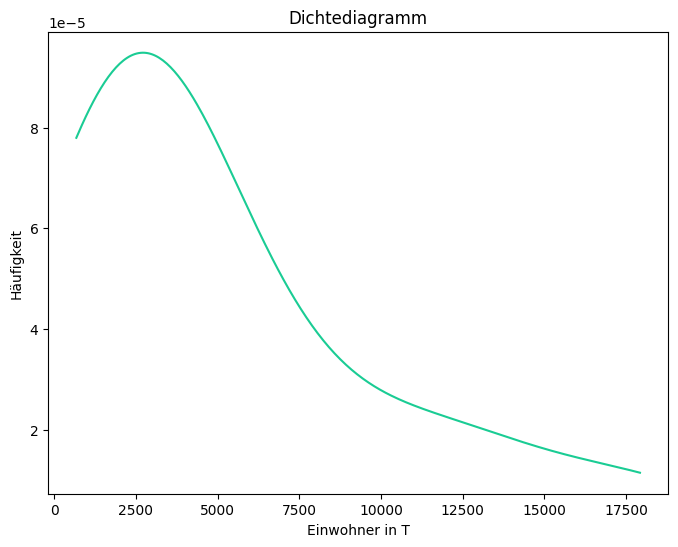

In [14]:
density = stats.kde.gaussian_kde(data["Einwohner in T"])
x = np.linspace(data["Einwohner in T"].min(),data["Einwohner in T"].max(),300)

plt.figure(figsize=(8,6))
plt.title("Dichtediagramm")
plt.plot(x, density(x),color="#1ACC94")
plt.ylabel("Häufigkeit")
plt.xlabel("Einwohner in T")
plt.show()

# Zusammenhangsmaße

## Pearson-Korrelationskoeffizient

In [15]:
stats.pearsonr(data["Einwohner in T"],data["Restaurants"])

PearsonRResult(statistic=np.float64(0.994277342662178), pvalue=np.float64(5.308722364817632e-15))

In [16]:
stats.pearsonr(data["Einwohner in T"],data["Einwohner in T"]**5)

PearsonRResult(statistic=np.float64(0.4393885299884228), pvalue=np.float64(0.08859279628710955))

## Korrelationsmatrix

In [17]:
data[["Einwohner in T","Restaurants"]].corr()

,Einwohner in T,Restaurants
Einwohner in T,1.000000,0.994277
Restaurants,0.994277,1.000000


## Streudiagramm

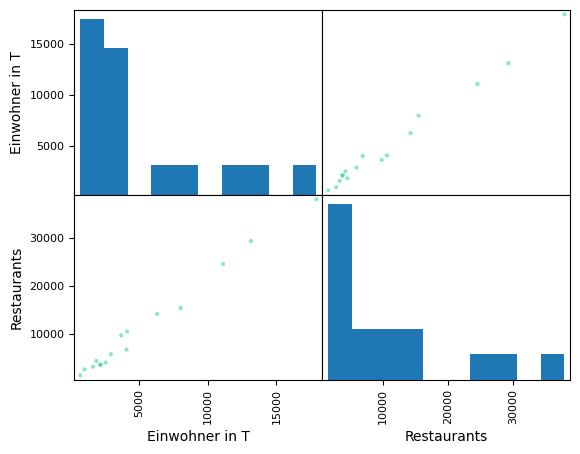

In [18]:
pd.plotting.scatter_matrix(data[["Einwohner in T","Restaurants"]],c="#1ACC94")
plt.show()